In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

# the model

In [37]:
def truth(time, y_intercept, slope, freq, amplitude):
    return amplitude*np.sin(2*np.pi*freq*time)+slope*time+y_intercept

In [90]:
num_obs = 30
para_1_y_intercept = 3
para_2_slope = 0.3
para_3_freq = 0.2
para_4_amplitude = 0.5
t = np.linspace(0.0,10.0,num_obs)
x_noisy = truth(t,para_1_y_intercept, para_2_slope,  para_3_freq, para_4_amplitude) + np.random.normal(size=num_obs)*0.02

# Identify only some parameter

In [91]:
my_eps = 0.001
BoundsLower = [para_1_y_intercept, -1000,       0,  para_4_amplitude]
BoundsUpper = [para_1_y_intercept+my_eps, 1000, 12, para_4_amplitude+my_eps]
p_opt, p_cov = curve_fit(
    truth, 
    t, x_noisy,
    bounds=(BoundsLower,BoundsUpper), method="trf",
    p0 = np.array([para_1_y_intercept, 0.2, 1.1, para_4_amplitude])
)
slope_fit = p_opt[1]
print(p_opt)
print([para_1_y_intercept, para_2_slope, para_3_freq, para_4_amplitude])
print(p_cov)
x_reconstructed = truth(t,*p_opt)

[3.001      0.29029367 1.09618103 0.5       ]
[3, 0.3, 0.2, 0.5]
[[ 3.47533483e-02 -5.13426589e-03  4.89411903e-05 -8.68911236e-04]
 [-5.13426589e-03  1.02832309e-03 -1.44842458e-05  1.89491101e-04]
 [ 4.89411903e-05 -1.44842458e-05  5.11285622e-05 -1.51441440e-05]
 [-8.68911236e-04  1.89491101e-04 -1.51441440e-05  1.90018891e-02]]


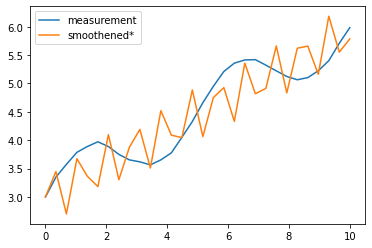

In [92]:
fig, ax = plt.subplots()
ax.plot(t,x_noisy,label='measurement')
ax.plot(t,x_reconstructed, label='smoothened*')
ax.legend()